In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing
from sklearn import utils

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import confusion_matrix, roc_curve, classification_report

Loaded  2 encoders.


In [2]:
csv = pd.read_csv("SPLUSiDR4_GaiaEDR3_BJ21_LAMOSTDR7_SEGUE.csv", encoding='latin-1', index_col=['ID', 'RA_SPLUS', 'DEC_SPLUS'])
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [3]:
csv

,,,u_0,J378_0,J395_0,J410_0,J430_0,g_0,J515_0,r_0,J660_0,i_0,...,feh_LAMOST_err,teff_LAMOST_recalibrated,logg_LAMOST_recalibrated,feh_LAMOST_recalibrated,teff_training,teff_training_err,logg_training,logg_training_err,feh_training,feh_training_err
ID,RA_SPLUS,DEC_SPLUS,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,18.740275,18.459236,18.448148,17.773576,17.745170,17.453267,17.281794,16.996103,16.979660,16.878871,...,NaN,NaN,NaN,NaN,5777,9,4.27,0.05,-0.42,0.04
iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,17.961170,17.557527,17.395885,16.940903,16.960105,16.798380,16.634018,16.553750,16.562136,16.524397,...,0.088,6695.90,3.986,-0.575,6567,18,3.82,0.06,-0.53,0.03
iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,15.610993,15.151029,14.938563,14.678464,14.614623,14.519800,14.358354,14.258020,14.280045,14.259589,...,0.058,6596.29,3.741,-0.471,6683,17,3.81,0.06,-0.35,0.02
iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,18.196770,17.862429,17.808803,17.216337,17.137261,16.869861,16.693803,16.442250,16.429073,16.330336,...,NaN,NaN,NaN,NaN,5847,46,4.08,0.04,-0.31,0.02
iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,17.882518,17.664711,17.522903,16.866583,16.798515,16.354411,16.198380,15.784910,15.729709,15.614563,...,0.051,5340.13,4.454,-0.703,5280,38,4.49,0.06,-0.84,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,19.305300,18.933995,18.973642,18.284042,18.290215,17.841979,17.704608,17.396171,17.388831,17.271604,...,0.119,5636.50,4.316,-0.692,5637,109,4.32,0.18,-0.69,0.12
iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,16.435508,16.125900,15.977774,15.279934,15.188697,14.779653,14.595130,14.282482,14.243314,14.105358,...,0.062,5591.32,4.205,-0.122,5591,59,4.21,0.09,-0.12,0.06
iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,15.140979,14.620409,14.519064,14.139961,14.072554,13.942583,13.793976,13.681078,13.694912,13.620172,...,0.040,6564.66,3.897,-0.647,6565,43,3.90,0.06,-0.65,0.04


In [64]:
def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = df[column].mean() + 3*df[column].std()
    down = df[column].mean() - 3*df[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

### Segue

In [11]:
xtrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [12]:
ytrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['teff_training']]

### Lamost

In [20]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [21]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['teff_training']]

#### Cap outliers

In [104]:
xtraincap = pd.DataFrame()

for column in xtrain:
    xtrain = cap_outliers(xtrain, column)
    
ytrain = cap_outliers(ytrain, 'teff_training')

In [28]:
x_train.shape

(41704, 12)

In [27]:
y_train.shape

(41704, 1)

In [22]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'teff_training')

In [23]:
# Separando a base para treino e para teste
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [44]:
#teff = LinearRegression()
#teff = DecisionTreeRegressor()
#teff = RandomForestRegressor()
#teff = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
#teff = GradientBoostingRegressor(random_state=11085)
#teff = ExtraTreesRegressor(n_estimators=100, random_state=11085)
#teff = BaggingRegressor(n_estimators=10, random_state=0)
#teff = GradientBoostingRegressor(random_state=0)
#teff = HistGradientBoostingRegressor()

teff.fit(x_train, y_train)

ValueError: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.

In [37]:
predteff = teff.predict(x_test)

Text(0, 0.5, 'Y_test')

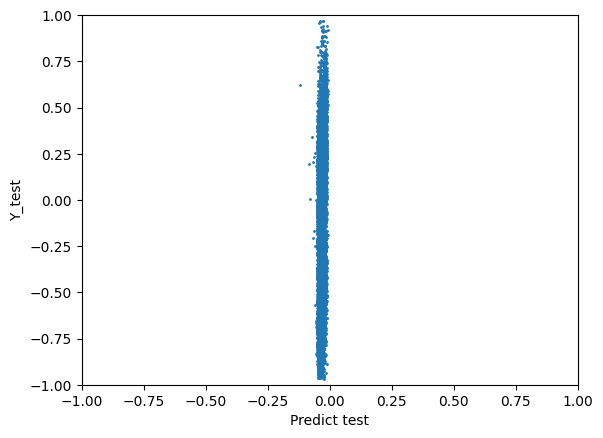

In [38]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predteff, y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [39]:
teff.score(x_test, y_test)

TypeError: No matching signature found

In [40]:
score = r2_score(y_test, predteff)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 1.0%


In [41]:
score = mean_absolute_error(y_test, predteff)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.29


In [42]:
score = np.sqrt(mean_absolute_error(y_test, predteff))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.54


## Logg

### Segue

In [55]:
xtrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [56]:
ytrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['logg_training']]

### Lamost

In [74]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [75]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['logg_training']]

In [76]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

ytrain = cap_outliers(ytrain, 'logg_training')

In [57]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 12 stellar filters from splus; For example, it is an array with the shape of (189654,13);

# train_y= encoder.encode_DataFrame(ytrain, 'teff_training')
train_y= ytrain

In [58]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [87]:
#logg = LinearRegression()
#logg = DecisionTreeRegressor()
#logg = RandomForestRegressor()
#logg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
#logg = GradientBoostingRegressor(random_state=11085)
#logg = ExtraTreesRegressor(n_estimators=100, random_state=11085)
#logg = BaggingRegressor(n_estimators=10, random_state=11085)
#logg = GradientBoostingRegressor(random_state=11085)
#logg = HistGradientBoostingRegressor()

logg.fit(x_train, y_train)

HistGradientBoostingRegressor()

In [88]:
predlogg = logg.predict(x_test)

Text(0, 0.5, 'Y_test')

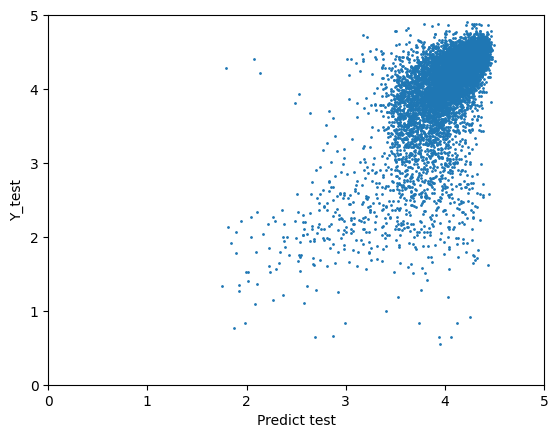

In [89]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predlogg, y_test, s=1)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [90]:
logg.score(x_test, y_test)

0.4047663918641915

In [91]:
score = r2_score(y_test, predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


In [92]:
score = mean_absolute_error(y_test, predlogg)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.31


In [93]:
score = np.sqrt(mean_absolute_error(y_test, predlogg))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.56


# Feh

### Segue

In [94]:
xtrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [95]:
ytrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                 (csv['teff_SEGUE']>4000) & 
                 (csv['teff_SEGUE']<7000),
                 ['feh_training']]

### Lamost

In [4]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [5]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['feh_training']]

In [52]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

ytrain = cap_outliers(ytrain, 'feh_training')

In [6]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 12 stellar filters from splus; For example, it is an array with the shape of (189654,13);

# train_y= encoder.encode_DataFrame(ytrain, 'teff_training')
train_y= ytrain

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

#### Linear Regression

Score = 0.19143825931959535
The accuracy of our model is 19.0%
The Mean Absolute Error of our Model is 0.26
The Mean Absolute Error of our Model is 0.26


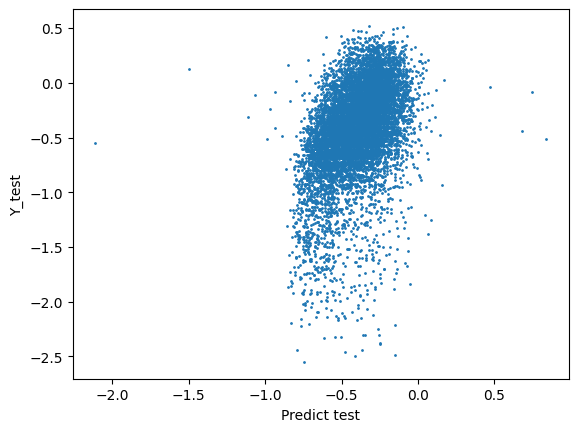

In [20]:
feh = LinearRegression()

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

#### Decision Tree Regressor

Score = 0.41738812680063053
The accuracy of our model is 42.0%
The Mean Absolute Error of our Model is 0.23
The Mean Absolute Error of our Model is 0.23

Score = 0.1798137754444895
The accuracy of our model is 18.0%
The Mean Absolute Error of our Model is 0.27
The Mean Absolute Error of our Model is 0.27

Score = 0.3399616484590531
The accuracy of our model is 34.0%
The Mean Absolute Error of our Model is 0.24
The Mean Absolute Error of our Model is 0.24

Score = 0.391549485181792
The accuracy of our model is 39.0%
The Mean Absolute Error of our Model is 0.23
The Mean Absolute Error of our Model is 0.23

Score = 0.41738812680063053
The accuracy of our model is 42.0%
The Mean Absolute Error of our Model is 0.23
The Mean Absolute Error of our Model is 0.23

Score = 0.41738812680063053
The accuracy of our model is 42.0%
The Mean Absolute Error of our Model is 0.23
The Mean Absolute Error of our Model is 0.23

Score = 0.41738812680063053
The accuracy of our model is 42.0%
The Mean Absolute

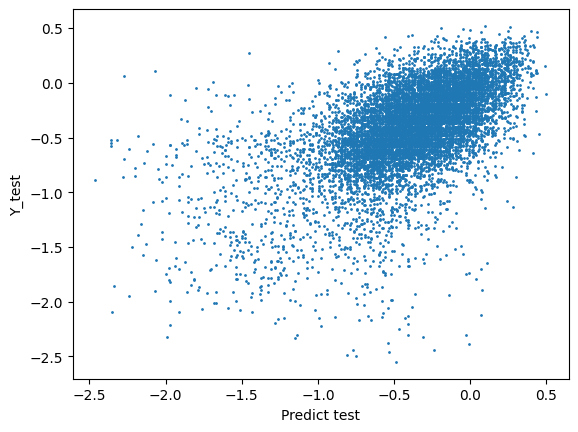

In [55]:
for split in ["best", "random"]:
    for mf in [None,0.1,5,10,12,32,1000, 100,"sqrt","auto","log2"]:
                    feh = DecisionTreeRegressor(
                        splitter= split, 
                        max_features= mf, 
                        random_state=11085,
                        
                    )

                    feh.fit(x_train, y_train)
                    predfeh = feh.predict(x_test)

                    print(f'Score = {feh.score(x_test, y_test)}')

                    score1 = r2_score(y_test, predfeh)
                    print("The accuracy of our model is {}%".format(round(score1, 2) *100))

                    score2 = mean_absolute_error(y_test, predfeh)
                    print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

                    score3 = mean_absolute_error(y_test, predfeh)
                    print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))
                    print()


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

#### Random Forest Regressor

Score = 0.6379826005713307
The accuracy of our model is 64.0%


Text(0, 0.5, 'Y_test')

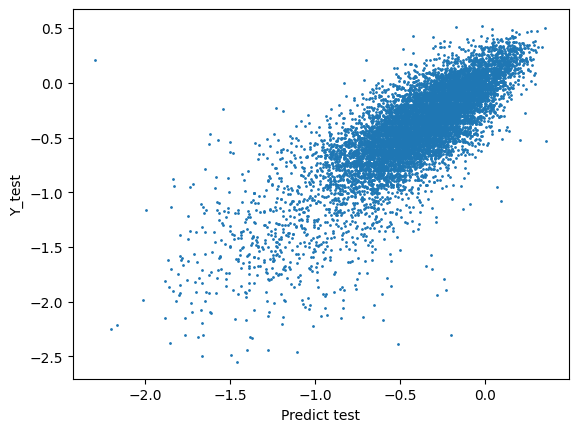

In [75]:
feh = RandomForestRegressor(n_estimators= 5, max_depth = 50)
feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)

print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

Score = 0.6833981417431638
The accuracy of our model is 68.0%
The Mean Absolute Error of our Model is 0.17
The Mean Absolute Error of our Model is 0.17


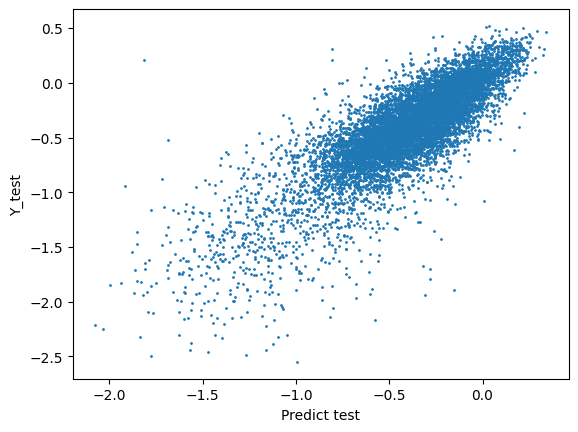

In [60]:
for ne in np.arange(50, 200, 50):
    for c in ["squared_error", "friedman_mse"]:
        for md in [None, 50, 100, 150, 200]:
            

feh = RandomForestRegressor(n_estimators= 10)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

In [ ]:
feh = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

In [ ]:
feh = GradientBoostingRegressor(random_state=11085)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

In [ ]:
feh = ExtraTreesRegressor(n_estimators=100, random_state=11085)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

In [ ]:
feh = BaggingRegressor(n_estimators=10, random_state=0)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

In [ ]:
feh = GradientBoostingRegressor(random_state=0)

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))

score = 0.5457506425792904
The accuracy of our model is 55.00000000000001%
The Mean Absolute Error of our Model is 0.3
The Mean Absolute Error of our Model is 0.3


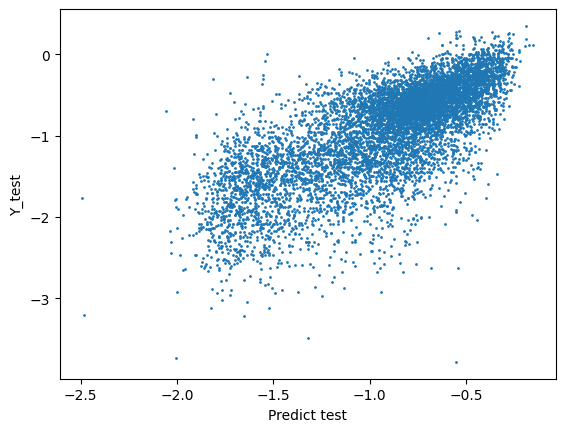

In [198]:
feh = HistGradientBoostingRegressor()

feh.fit(x_train, y_train)
predfeh = feh.predict(x_test)


# plota o pred de acordo com o Y_test (teff)
plt.scatter(predfeh, y_test, s=1)
#plt.xlim(-1, 1)
#plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')


print(f'Score = {feh.score(x_test, y_test)}')

score1 = r2_score(y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

score2 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

score3 = mean_absolute_error(y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score3, 2)))